**This code file has, visualization of streets with highest reported crimes, and multiple trials of me trying forecasting with ARIMA model**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Processed_data.csv')

C:\Users\Exam15\AppData\Local\Temp\ipykernel_7760\3336045349.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Processed_data.csv')


In [3]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier
0,I152049588,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155.0,0,2015-06-15 00:01:00,2015,6,Monday,0,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)",Tier 3
1,I152049593,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
2,I152049594,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
3,I152049463,1402,VANDALISM,E18,493.0,0,2015-06-15 00:03:00,2015,6,Monday,0,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Tier 4
4,I152049469,802,ASSAULT SIMPLE - BATTERY,D14,809.0,0,2015-06-15 00:45:00,2015,6,Monday,0,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",Tier 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216533,232051183,801,ASSAULT - SIMPLE,D4,NaN,0,2023-06-29 16:18:00+00:00,2023,6,Thursday,16,CAMDEN ST,42.338266,-71.081765,"(42.33826649104909, -71.0817645306216)",Tier 2
216534,232056119,613,LARCENY SHOPLIFTING,D4,NaN,0,2023-07-16 13:55:00+00:00,2023,7,Sunday,13,NEWBURY ST,42.348405,-71.086884,"(42.34840532084056, -71.08688391940139)",Tier 3
216535,232066199,1402,VANDALISM,B2,NaN,0,2023-08-18 17:50:00+00:00,2023,8,Friday,17,JUDSON ST,42.319501,-71.075165,"(42.31950147916197, -71.07516529856777)",Tier 4
216536,232067269,613,LARCENY SHOPLIFTING,D4,NaN,0,2023-08-22 15:07:00+00:00,2023,8,Tuesday,15,HUNTINGTON AVE,42.347309,-71.079152,"(42.34730934597846, -71.07915218290486)",Tier 3


In [11]:
# Check the column names in your DataFrame
print(df.columns)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'STREET', 'Lat', 'Long', 'Location', 'Tier'],
      dtype='object')


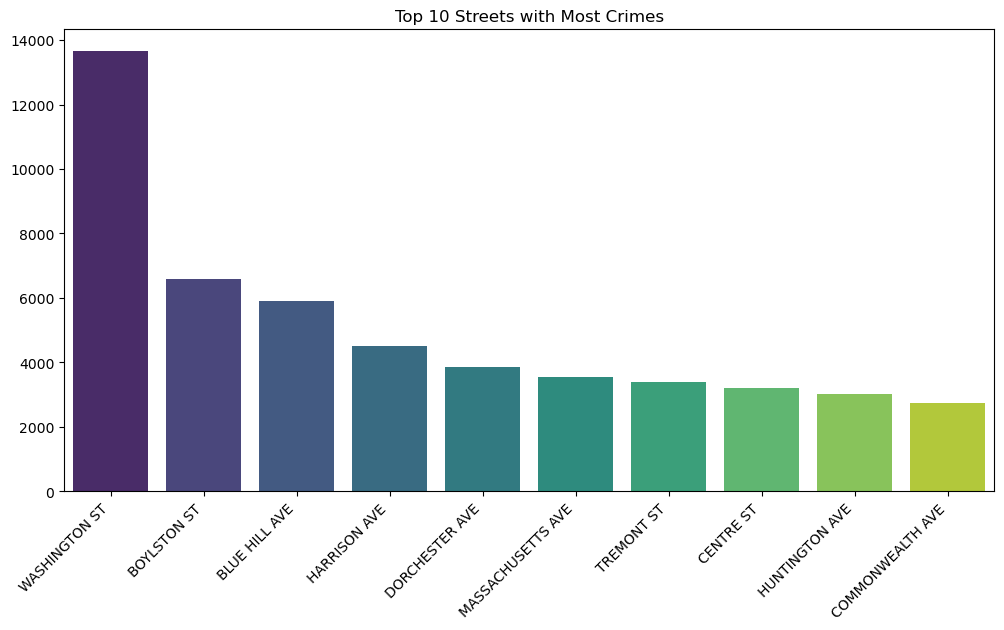

In [5]:
# Plotting the top N streets with the most crimes
top_n_streets = 10
top_streets = df['STREET'].value_counts().nlargest(top_n_streets)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_streets.index, y=top_streets.values, palette="viridis")
plt.title(f'Top {top_n_streets} Streets with Most Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

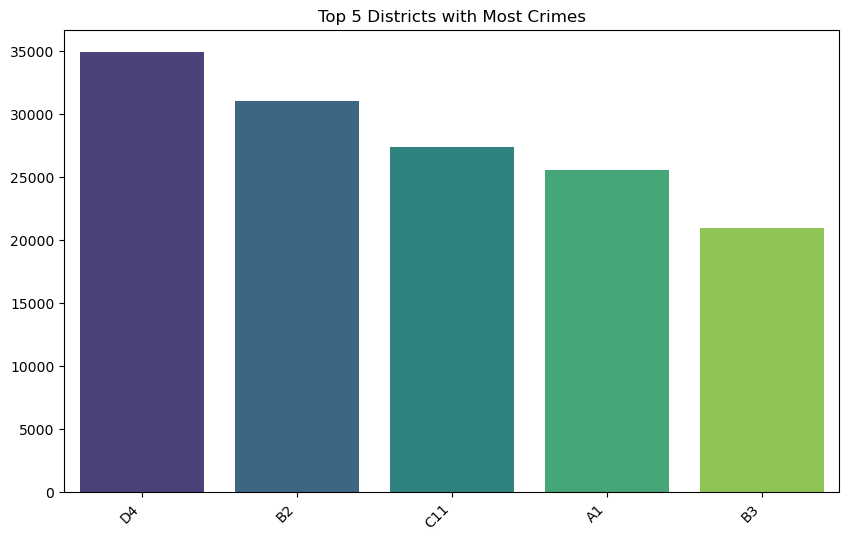

In [6]:
# Plotting the top N districts with the most crimes
top_n_districts = 5
top_districts = df['DISTRICT'].value_counts().nlargest(top_n_districts)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_districts.index, y=top_districts.values, palette="viridis")
plt.title(f'Top {top_n_districts} Districts with Most Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Exam15\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Exam15\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Exam15\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


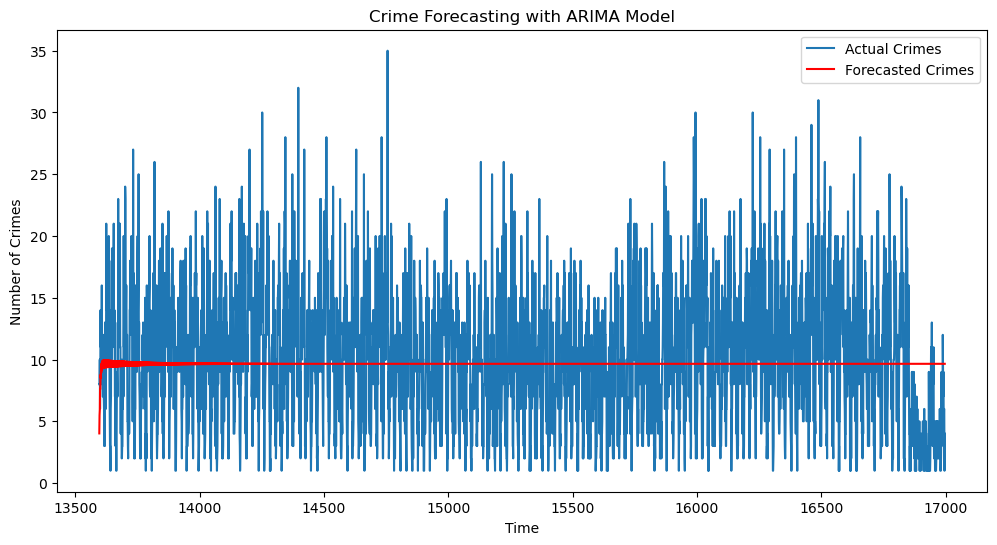

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_file.csv' with the actual file name or provide the DataFrame directly if it's in memory
# df = pd.read_csv('your_file.csv')

# Extract relevant time-related columns
time_columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']

# Resample data to daily frequency and count crimes per day
crimes_per_day = df.groupby(time_columns).size().reset_index(name='crime_count')

# Train-test split
train_size = int(len(crimes_per_day) * 0.8)
train, test = crimes_per_day[:train_size], crimes_per_day[train_size:]

# Fit ARIMA model
model = ARIMA(train['crime_count'], order=(5, 1, 2))  # Adjust order as needed
fit_model = model.fit()

# Forecast future crimes
forecast_steps = len(test)
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['crime_count'], label='Actual Crimes')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecasted Crimes')
plt.title('Crime Forecasting with ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

C:\Users\Exam15\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Exam15\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


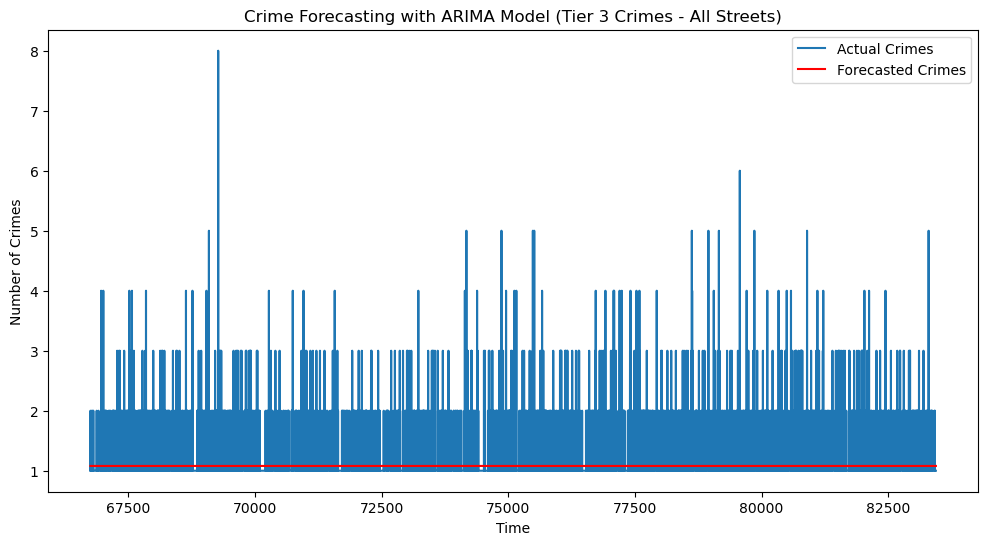

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_file.csv' with the actual file name or provide the DataFrame directly if it's in memory
# df = pd.read_csv('your_file.csv')

# Filter data for Tier 3 crimes
df_tier3 = df[df['Tier'] == 'Tier 3']

# Extract relevant time-related columns
time_columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET']

# Resample data to daily frequency and count crimes per day for each street
crimes_per_day_street = df_tier3.groupby(time_columns).size().reset_index(name='crime_count')

# Train-test split
train_size = int(len(crimes_per_day_street) * 0.8)
train, test = crimes_per_day_street[:train_size], crimes_per_day_street[train_size:]

# Fit ARIMA model
model = ARIMA(train['crime_count'], order=(5, 1, 2))  # Adjust order as needed
fit_model = model.fit()

# Forecast future crimes
forecast_steps = len(test)
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['crime_count'], label='Actual Crimes')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecasted Crimes')
plt.title('Crime Forecasting with ARIMA Model (Tier 3 Crimes - All Streets)')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


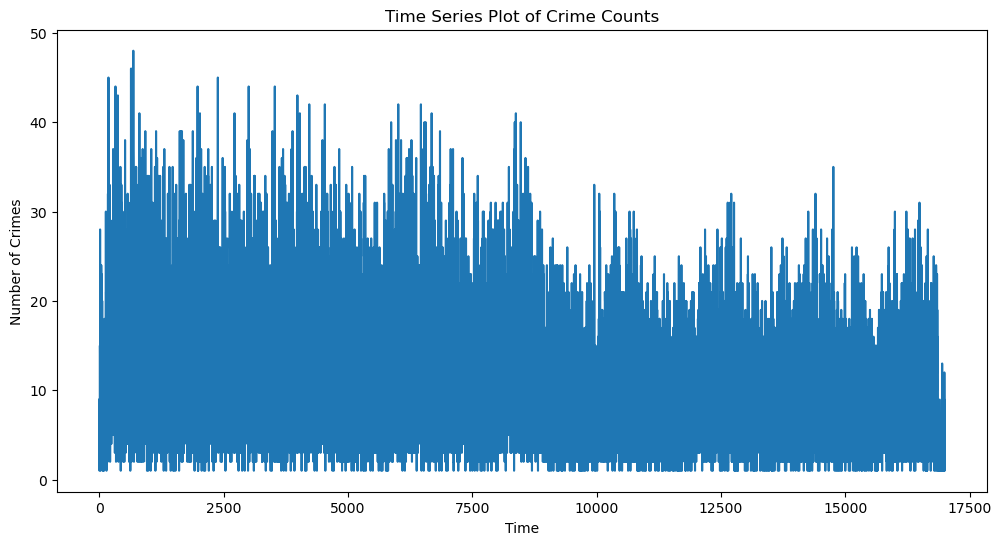

In [14]:
# Assuming your DataFrame is named crimes_per_day
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_day.index, crimes_per_day['crime_count'])
plt.title('Time Series Plot of Crime Counts')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()

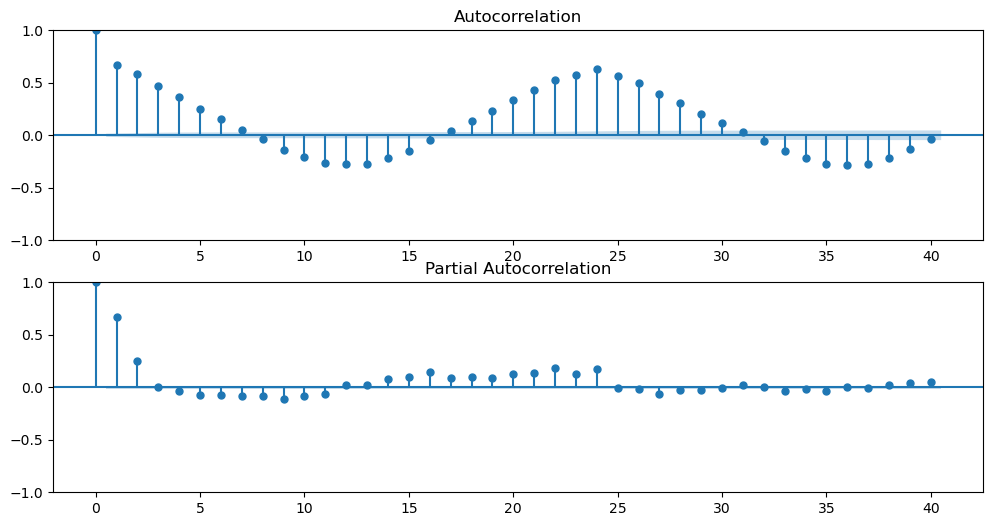

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# ACF plot
ax1 = plt.subplot(211)
plot_acf(crimes_per_day['crime_count'], ax=ax1, lags=40)

# PACF plot
ax2 = plt.subplot(212)
plot_pacf(crimes_per_day['crime_count'], ax=ax2, lags=40)

plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(crimes_per_day['crime_count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.559308546115993
p-value: 3.039860797718157e-11
Critical Values: {'1%': -3.430735812322089, '5%': -2.861710513797981, '10%': -2.566860760128785}


Mean Squared Error: 31.148389019685634


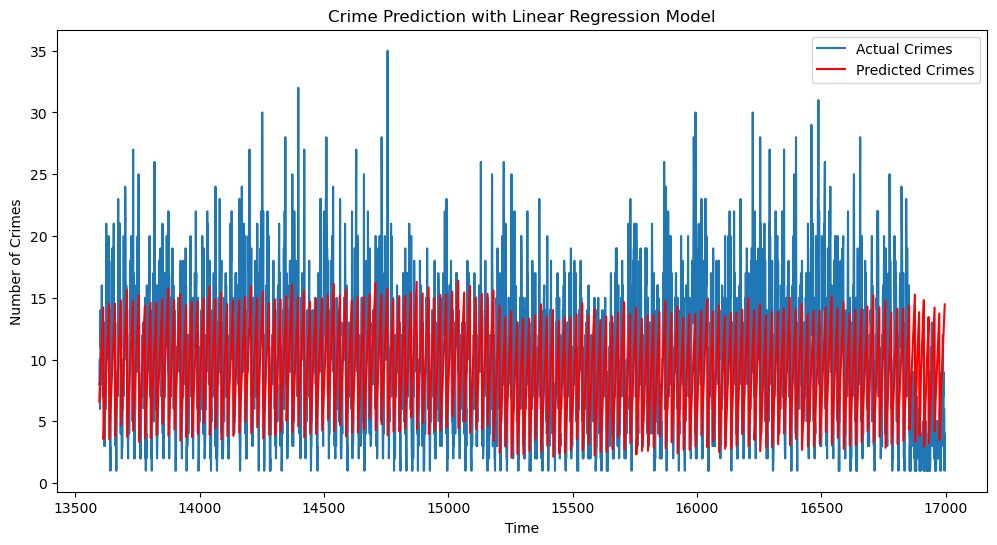

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_file.csv' with the actual file name or provide the DataFrame directly if it's in memory
# df = pd.read_csv('your_file.csv')

# Select relevant features
features = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']

# Group by the selected features and calculate crime counts
crime_data = df.groupby(features).size().reset_index(name='crime_count')

# Train-test split
train_size = int(len(crime_data) * 0.8)
train, test = crime_data[:train_size], crime_data[train_size:]

# Prepare features and target variables for training and testing
X_train, y_train = train[features], train['crime_count']
X_test, y_test = test[features], test['crime_count']

# Create a column transformer to handle one-hot encoding for 'DAY_OF_WEEK'
preprocessor = ColumnTransformer(
    transformers=[
        ('day_of_week', OneHotEncoder(), ['DAY_OF_WEEK'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the column transformer and the linear regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Crimes')
plt.plot(test.index, predictions, color='red', label='Predicted Crimes')
plt.title('Crime Prediction with Linear Regression Model')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta

# Assuming your DataFrame is named df
# Replace 'your_file.csv' with the actual file name or provide the DataFrame directly if it's in memory
# df = pd.read_csv('your_file.csv')

# Filter data for Tier 3 crimes
df_tier3 = df[df['Tier'] == 'Tier 3']

# Select relevant features
features = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'DISTRICT']

# Group by the selected features and calculate crime counts
crime_data = df_tier3.groupby(features).size().reset_index(name='crime_count')

# Train-test split
train_size = int(len(crime_data) * 0.8)
train, test = crime_data[:train_size], crime_data[train_size:]

# Prepare features and target variables for training and testing
X_train, y_train = train[features], train['crime_count']
X_test, y_test = test[features], test['crime_count']

# Create a column transformer to handle one-hot encoding for 'DAY_OF_WEEK' and 'DISTRICT'
preprocessor = ColumnTransformer(
    transformers=[
        ('day_of_week', OneHotEncoder(), ['DAY_OF_WEEK']),
        ('district', OneHotEncoder(), ['DISTRICT'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the column transformer and the random forest regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Store predictions along with dates and districts in a DataFrame
predictions_df = pd.DataFrame({
    'Date': test.apply(lambda row: datetime(row['YEAR'], row['MONTH'], 1), axis=1),  # Assuming day is set to 1 for simplicity
    'District': test['DISTRICT'],
    'Actual Crimes': y_test,
    'Predicted Crimes': predictions
})

# Display the DataFrame with actual and predicted crimes
print(predictions_df)

# Forecast Tier 3 crimes for the next month
# Create a dataframe with the next month's dates
current_date = datetime.now()
end_date = current_date + timedelta(days=30)
forecast_dates = pd.date_range(current_date, end_date, freq='H')

# Use unique districts from the dataset for the forecast
unique_districts = df['DISTRICT'].unique()

# Create a dataframe with all combinations of forecast dates and unique districts
forecast_data = pd.DataFrame([(date, district) for date in forecast_dates for district in unique_districts], columns=['Date', 'District'])

# Set the 'HOUR' column to 0 for forecasting the daily count
forecast_data['HOUR'] = 0

# Use one-hot encoding for 'DAY_OF_WEEK' and 'DISTRICT' in the forecast data
forecast_data_encoded = preprocessor.transform(forecast_data[['DAY_OF_WEEK', 'DISTRICT']])
forecast_data_encoded_df = pd.DataFrame(forecast_data_encoded, columns=preprocessor.get_feature_names_out(['day_of_week', 'district']))

# Concatenate the encoded features with the remaining features
forecast_data_final = pd.concat([forecast_data_encoded_df, forecast_data[['YEAR', 'MONTH', 'HOUR']]], axis=1)

# Make predictions for the next month
forecast_predictions = model.predict(forecast_data_final)

# Store forecast predictions along with dates and districts in a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_data['Date'],
    'District': forecast_data['District'],
    'Forecasted Crimes': forecast_predictions
})

# Display the DataFrame with forecasted crimes
print(forecast_df)


            Date District  Actual Crimes  Predicted Crimes
49714 2021-11-01       C6              1              1.42
49715 2021-11-01      D14              1              1.58
49716 2021-11-01       E5              2              1.09
49717 2021-11-01       B2              2              1.44
49718 2021-11-01       D4              1              1.86
...          ...      ...            ...               ...
62138 2023-11-01       C6              1              1.08
62139 2023-11-01       D4              1              1.42
62140 2023-11-01       C6              1              1.17
62141 2023-11-01      D14              1              1.58
62142 2023-11-01       E5              1              1.03

[12429 rows x 4 columns]


KeyError: "None of [Index(['DAY_OF_WEEK', 'DISTRICT'], dtype='object')] are in the [columns]"

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('Processed_data.csv')

# Encode categorical variables
df = pd.get_dummies(df, columns=['DISTRICT', 'DAY_OF_WEEK', 'SHOOTING'], drop_first=True)

# Define features (X) and target variable (y)
features = ['OFFENSE_CODE', 'REPORTING_AREA', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long', 'DISTRICT_B3', 'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'SHOOTING_Y']
X = df[features]
y = df['Tier']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


C:\Users\Exam15\AppData\Local\Temp\ipykernel_10624\3492437652.py:9: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Processed_data.csv')


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values